# Análise dos dados de queimadas no estados brasileiros 


O objetivo deste trabalho consiste em estimar a quantidade de focos de incêndio nos estados brasileiros em anos futuros, considerando os dados dos anos atual e anteriores - Para criação do modelo, será utilizado somente dados dos estados do Brasil

In [1]:
##Bibliotecas utilizadas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from enum import Enum
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
#####Funções
class DataSourceEnum(Enum):
    GOOGLE_DRIVE = 'google drive'
    
class DataSourceNotFoundException(Exception):
    def __init__(self):
        super().__init__("Fonte para buscar dados é inválida.")
    
    
    
    
def fetchCSV(url: str, source: DataSourceEnum, encoding: str = 'UTF-8'):
    if source == DataSourceEnum.GOOGLE_DRIVE:
        baseUrl = "https://drive.google.com/uc?id="
        csvData = f"{baseUrl}{url.split('/')[-2]}"
    else:
        raise DataSourceNotFoundException()
        
    if encoding:
        return pd.read_csv(csvData,encoding=encoding)
    return pd.read_csv(csvData)


def cleanData(dataframe, inplace = False):
    return dataframe.dropna(inplace=inplace).drop_duplicates(inplace=inplace)        

class DateMonthEnum(Enum):
    JAN = "Janeiro"
    FEB = "Fevereiro"
    MAR = "Março"
    APR = "Abril"
    MAY = "Maio"
    JUN = "Junho"
    JUL = "Julho"
    AUG = "Agosto"
    SEP = "Setembro"
    OCT = "Outubro"
    NOV = "Novembro"
    DEC = "Dezembro"

    def getMonths():
        return DateMonthEnum.__members__.values()

numericDateMonth = {
    DateMonthEnum.JAN: 1,
    DateMonthEnum.FEB: 2,
    DateMonthEnum.MAR: 3,
    DateMonthEnum.APR: 4,
    DateMonthEnum.MAY: 5,
    DateMonthEnum.JUN: 6,
    DateMonthEnum.JUL: 7,
    DateMonthEnum.AUG: 8,
    DateMonthEnum.SEP: 9,
    DateMonthEnum.OCT: 10,
    DateMonthEnum.NOV: 11,
    DateMonthEnum.DEC: 12,
}
    
def altermonth(dataframe):
    for month in DateMonthEnum.getMonths():
        dataframe.month[dataframe.month==month.value] = numericDateMonth[month]
        
    return dataframe

   
def mergeDataBases(db1, db2):
    db3 = pd.concat([db1,db2])
    return db3

def selection_variables_train_test(x,y):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    return xTrain, xTest, yTrain, yTest

   
def fit_model(classifier,xTrain,yTrain):
    classifier.fit(xTrain,yTrain)
    return classifier


def plot_graph(dataframe,Titulo:"Gráfico"):
    
    return dataframe.plot(figsize=(10, 6)).set_title(Titulo, fontsize = 15)

def create_dataframe(xTest,yPred,prediction_relative_error,yTest):
    
    dataframe = xTest.copy()
    dataframe['prediction'] = yPred
    dataframe['relative_error'] = prediction_relative_error
    dataframe['Focos de incêndio'] = yTest
    
    return dataframe


def cross_validation(x_axis,y_axis):
  kfold  = KFold(n_splits=10, shuffle=True) 

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()
  NeuralRegression = MLPRegressor()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)
  NeuralRegression_result = cross_val_score(NeuralRegression, x, y, cv = kfold)
    
  print("Linear Regression Média (R^2): {0}\nElastic Net Média (R^2): {1}\nRidge Média (R^2): {2}\nLasso Média (R^2): {3}\nNeural (R^2): {4}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean(),NeuralRegression_result.mean()))


 








In [3]:
##Importação dos Dados
#Dados queimadas - Amazônia Legal
forestFiresAM = fetchCSV(url='https://drive.google.com/file/d/1vRVra-yLlZxknweY-6YIQQJjWCqK75mT/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE)
forestFiresAM = cleanData(forestFiresAM)

#Dados queimadas - Brasil
forestFires = fetchCSV(url='https://drive.google.com/file/d/1VdFxMxEWzUuqYLTfv2grmFD2tDRdOez-/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
forestFires = cleanData(forestFires)
forestFires

#Dados Desmatamento - Amazônia Legal
deforestation = fetchCSV(url='https://drive.google.com/file/d/1gF9JQPHV7dbviqLl8Z-MY_C8iyF1OREd/view?usp=sharing', source=DataSourceEnum.GOOGLE_DRIVE, encoding='latin-1')
deforestation = cleanData(deforestation)




In [ ]:
#Análise dos dataframes

In [4]:
deforestation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ï»¿Ano/Estados  16 non-null     int64
 1   AC              16 non-null     int64
 2   AM              16 non-null     int64
 3   AP              16 non-null     int64
 4   MA              16 non-null     int64
 5   MT              16 non-null     int64
 6   PA              16 non-null     int64
 7   RO              16 non-null     int64
 8   RR              16 non-null     int64
 9   TO              16 non-null     int64
 10  AMZ LEGAL       16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [5]:
forestFires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6422 non-null   int64  
 1   state   6422 non-null   object 
 2   month   6422 non-null   object 
 3   number  6422 non-null   float64
 4   date    6422 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 301.0+ KB


In [6]:
forestFiresAM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 115.1+ KB


In [7]:
#Conhecer variáveis disponíveis 
deforestation.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [8]:
forestFires.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [9]:
forestFiresAM.columns

Index(['year', 'month', 'state', 'latitude', 'longitude', 'firespots'], dtype='object')

In [10]:
#Conhecendo as estruturas dos conjuntos
deforestation.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [11]:
forestFires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
forestFiresAM.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [13]:
#Ajustar meses para Dataframe com todos os estados de queimada
forestFires = altermonth(forestFires)
forestFires

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,12,128.0,2012-01-01
6450,2013,Tocantins,12,85.0,2013-01-01
6451,2014,Tocantins,12,223.0,2014-01-01
6452,2015,Tocantins,12,373.0,2015-01-01


In [14]:
### Análise dos dados de Todos os estados
forestFires['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

In [16]:
### Análise dos dados dos estados da Amazônia LEGAL
forestFiresAM['firespots'].describe()

count     2104.000000
mean      1167.417776
std       2959.558714
min          1.000000
25%         16.000000
50%        121.000000
75%        755.000000
max      37926.000000
Name: firespots, dtype: float64

In [17]:
##Verificando o máximo e mínimo de focos de incêndio no conjunto de Dados
print('Max number of registered fires in a month: ',forestFires['number'].max())
print('State: ',forestFires[forestFires['number'] ==  forestFires['number'].max()]['state'].iloc[0])
print('Month: ',forestFires[forestFires['number'] ==  forestFires['number'].max()]['month'].iloc[0])
print('Year: ',forestFires[forestFires['number'] ==  forestFires['number'].max()]['year'].iloc[0])

Max number of registered fires in a month:  998.0
State:  Amazonas
Month:  9
Year:  2008


In [18]:
print('Min number of registered fires in a month: ',forestFires['number'].min())
print('State: ',forestFires[forestFires['number'] ==  forestFires['number'].min()]['state'].iloc[0])
print('Month: ',forestFires[forestFires['number'] ==  forestFires['number'].min()]['month'].iloc[0])
print('Year: ',forestFires[forestFires['number'] ==  forestFires['number'].min()]['year'].iloc[0])

Min number of registered fires in a month:  0.0
State:  Acre
Month:  1
Year:  1998


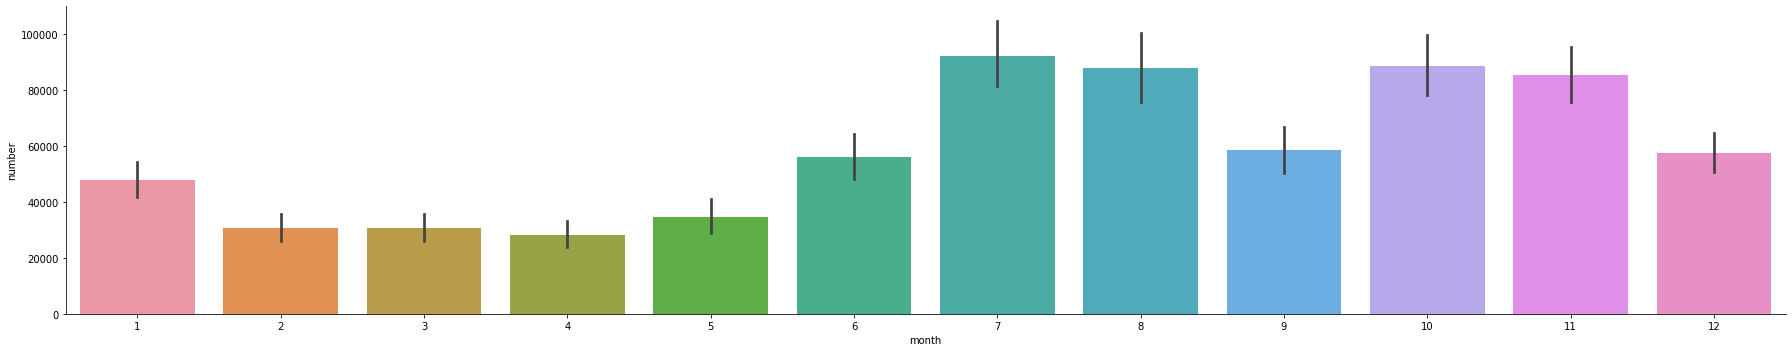

In [19]:
##Análise dos dados atrvés dos gráficos
sns.catplot(x='month', y='number', kind='bar',data=forestFires[['month','number']], aspect=5, estimator=sum)

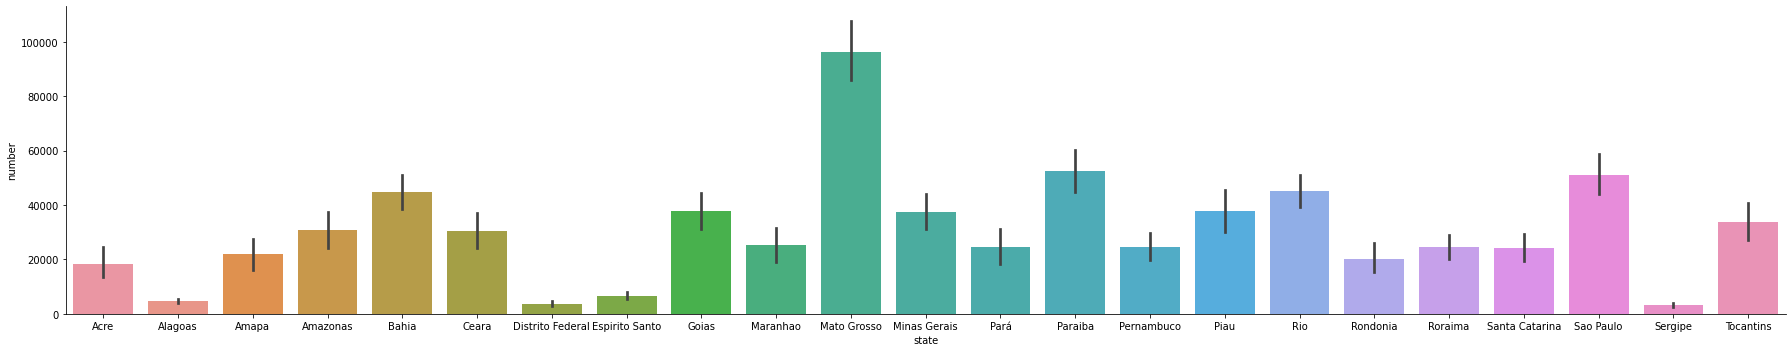

In [20]:
sns.catplot(x='state', y='number', kind='bar',data=forestFires[['state','number']], aspect=5, estimator=sum)

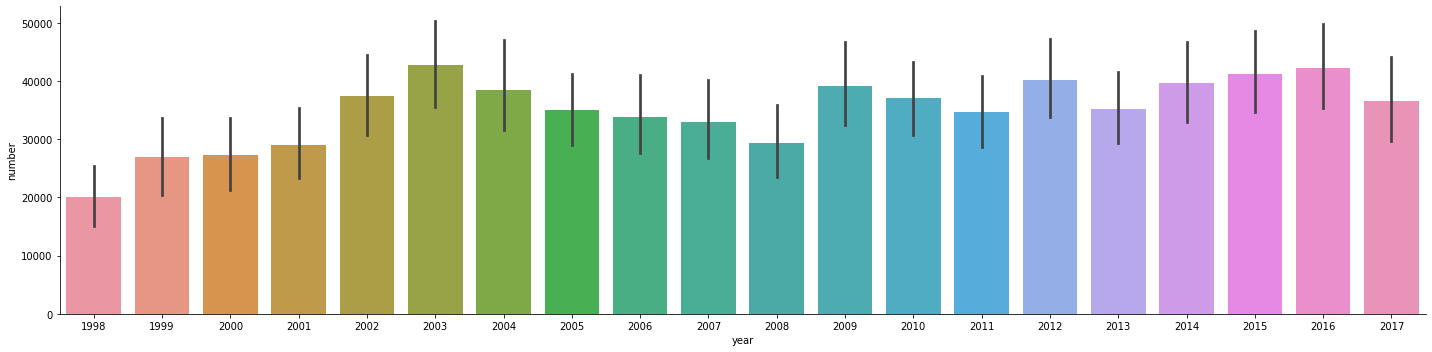

In [21]:
sns.catplot(data=forestFires[['year','number']],x='year', y='number', kind='bar', aspect=4, estimator=sum)

In [22]:
##Buscar correlação entre váriaveis
forestFires.corr()

,year,number
year,1.0000,0.0626
number,0.0626,1.0000


In [24]:
#Ajustar variáveis categóricas para indicadoras
dados_estados_binarios = pd.get_dummies(forestFires['state'])
dados_estados_binarios.head()

,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,Maranhao,...,Pará,Pernambuco,Piau,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vars_categoricas = ['state']

df2_forestFires  = forestFires 

for i in vars_categoricas:
  dados_estados_binarios = pd.get_dummies(forestFires[i])
  df2_forestFires = df2_forestFires.drop(i,axis = 1)
  df2_forestFires=df2_forestFires.join(dados_estados_binarios)

df2_forestFires

,year,month,number,date,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,...,Pará,Pernambuco,Piau,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,1998,1,0.0,1998-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1999,1,0.0,1999-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,1,0.0,2000-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,1,0.0,2001-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2002,1,0.0,2002-01-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,2012,12,128.0,2012-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6450,2013,12,85.0,2013-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6451,2014,12,223.0,2014-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6452,2015,12,373.0,2015-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#Ajustes no conjunto de dados
df2_forestFires = df2_forestFires.loc[df2_forestFires['year']>=2000]
columns_df2 = ['year', 'number'
               , 'Acre', 'Alagoas', 'Amapa',
       'Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo',
       'Goias', 'Maranhao', 'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará',
       'Pernambuco', 'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins']
df2_forestFires = df2_forestFires[columns_df2]
df2_forestFires = df2_forestFires.groupby(['year'
               , 'Acre', 'Alagoas', 'Amapa',
       'Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo',
       'Goias', 'Maranhao', 'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará',
       'Pernambuco', 'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins']).sum().reset_index()

In [27]:
#Separando dados de target e features
target = "number"

y = df2_forestFires[target]
X = df2_forestFires.drop([target],axis=1)

In [28]:
#Separando dados de treino e teste
xTrain, xTest, yTrain, yTest = selection_variables_train_test(X,y)

In [29]:
#Fazendo validação cruzada
cross_validation(X,y)

C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Linear Regression Média (R^2): 0.7016826786482465
Elastic Net Média (R^2): 0.01326109057736503
Ridge Média (R^2): 0.7075143994106899
Lasso Média (R^2): 0.6888500110400613
Neural (R^2): -0.0459565069616857


C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
####Modelo de Regressão Linear
regr_linear = fit_model(LinearRegression(),xTrain,yTrain)

In [31]:
yPred = regr_linear.predict(xTest)

In [32]:
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [33]:
df_regressao_linear = create_dataframe(xTest,yPred,prediction_relative_error,yTest)
df_regressao_linear

,year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,prediction,relative_error,Focos de incêndio
159,2006,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,214.070154,32.962828,161.000
30,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1915.505425,162.125106,730.760
285,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1111.427547,21.978584,1424.516
310,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017.586068,17.104025,2433.877
173,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5536.567962,57.481061,3515.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1008.304883,14.982438,1185.996
130,2005,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,299.620368,147.620139,121.000
323,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,288.304403,177.215772,104.000
398,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2150.098029,44.496030,1487.998


In [34]:
regr_linear.score(xTest, yTest)

0.6300924930365721

In [35]:
df_regressao_linear = df_regressao_linear.sort_values(['year'])
df_regressao_linear.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Regressão Linear')

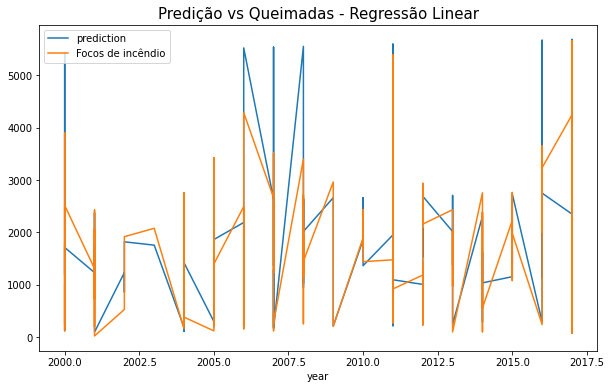

In [36]:
plot_graph(df_regressao_linear[['prediction','Focos de incêndio']],"Predição vs Queimadas - Regressão Linear")

In [37]:
#Rede neural
xTrain_neural, xTest_neural, yTrain_neural, yTest_neural = selection_variables_train_test(X,y)

In [38]:
classifier_RN = fit_model(MLPRegressor(),xTrain_neural,yTrain_neural)

In [39]:
yPred_neural = classifier_RN.predict(xTest_neural)

In [40]:
prediction_relative_error_neural = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_neural,yTest_neural))]

In [41]:
df_rede_neural = create_dataframe(xTest_neural,yPred_neural,prediction_relative_error_neural,yTest_neural)
df_rede_neural

,year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,prediction,relative_error,Focos de incêndio
244,2010,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1683.764024,11.250800,1897.216
410,2017,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1688.751450,86.210402,906.905
31,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1674.740609,55.068575,1080.000
337,2014,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1684.501896,385.447232,347.000
194,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1682.945861,0.358445,1689.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2014,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1686.240496,29.325029,2385.909
72,2003,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1676.682839,4.216102,1608.852
92,2004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1678.765774,67.339418,1003.210
170,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1679.489637,8.391608,1833.336


In [42]:
classifier_RN.score(xTest_neural, yTest_neural)

-0.2171170111617482

In [43]:
df_rede_neural = df_rede_neural.sort_values(['year'])
df_rede_neural.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Rede Neural')

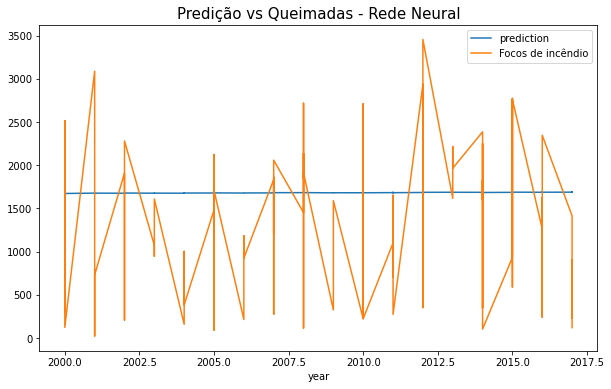

In [44]:
plot_graph(df_rede_neural[['prediction','Focos de incêndio']],"Predição vs Queimadas - Rede Neural")

In [45]:
##Elastic Net
xTrain_elastic, xTest_elastic, yTrain_elastic, yTest_elastic =  selection_variables_train_test(X,y)


In [46]:
classifier_EN = fit_model(ElasticNet(),xTrain_elastic,yTrain_elastic)


In [47]:
yPred_elastic = classifier_EN.predict(xTest_elastic)

In [48]:
prediction_relative_error_elastic = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_elastic,yTest_elastic))]

In [49]:


df_en = create_dataframe(xTest_elastic,yPred_elastic,prediction_relative_error_elastic,yTest_elastic)
df_en

,year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,prediction,relative_error,Focos de incêndio
18,2000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1456.540460,5.650913,1378.635
66,2002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1419.157345,64.617090,862.096
186,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1656.915001,38.886421,1193.000
270,2011,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1678.410351,116.848322,774.002
279,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1683.176274,68.317627,1000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2006,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1600.321840,35.807387,2493.000
303,2013,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1707.876145,71.818526,994.000
145,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1574.308599,33.237155,2358.061
263,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1754.114233,46.520908,3280.000


In [50]:
classifier_EN.score(xTest_elastic, yTest_elastic)

0.07101166646651469

In [51]:
df_en = df_en.sort_values(['year'])
df_en.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Elastic')

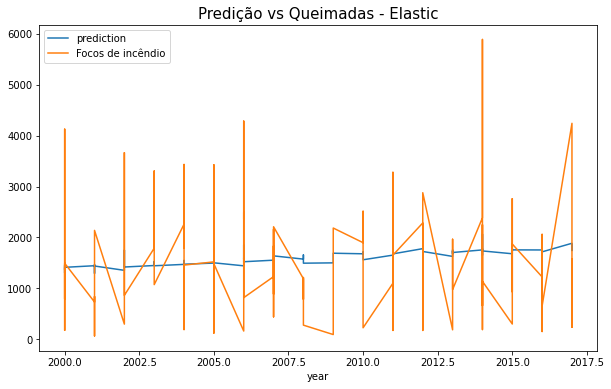

In [52]:
plot_graph(df_en[['prediction','Focos de incêndio']],"Predição vs Queimadas - Elastic")

In [53]:
#lASSO 
xTrain_lasso, xTest_lasso, yTrain_lasso, yTest_lasso =  selection_variables_train_test(X,y)


In [54]:

 
classifier_lasso = fit_model(Lasso(),xTrain_lasso,yTrain_lasso)


In [55]:
yPred_lasso = classifier_lasso.predict(xTest_lasso)

In [56]:
prediction_relative_error_lasso = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred_lasso,yTest_lasso))]

In [57]:

df_lasso = create_dataframe(xTest_lasso,yPred_lasso,prediction_relative_error_lasso,yTest_lasso)
df_lasso

,year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,prediction,relative_error,Focos de incêndio
51,2002,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,918.998971,36.711808,1452.086
95,2004,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1048.894459,64.504418,2955.000
370,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2388.143147,26.177955,3235.000
32,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1219.309004,46.063514,834.780
371,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1279.550426,45.458209,2346.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1983.875571,1.176690,1960.803
383,2016,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,527.123386,19.400094,654.000
162,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,155.492799,25.397419,124.000
405,2017,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2006.298605,26.890094,1581.131


In [58]:
classifier_lasso.score(xTest_lasso,yTest_lasso)

0.7303455597899937

In [59]:
df_lasso = df_lasso.sort_values(['year'])
df_lasso.set_index(['year'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Lasso')

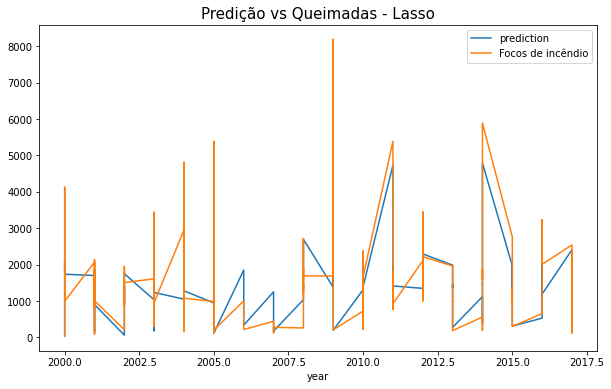

In [60]:
plot_graph(df_lasso[['prediction','Focos de incêndio']],"Predição vs Queimadas - Lasso")